# EDA

Para poder desarrollar un buen modelo de machine learning, necesitamos ver el comportamiento de nuestros datos; como están distribuídos, como se relacionan una en función de la otra, etc.

Importo las librerías requeridas para realizar el EDA

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

DataFrame de Movies_ETL

In [22]:
pd.set_option("display.max_columns", None)
df_movies = pd.read_csv("Movies_ETL.csv")
df_movies

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,id_belongs_to_collection,name_belongs_to_collection,poster_path_belongs_to_collection,backdrop_path_belongs_to_collection,genres,production_companies,production_countries,spoken_languages,release_year,return
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,10194.0,'Toy Story Collection','/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg','poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',"['Animation', 'Comedy', 'Family']",Pixar Animation Studios,['United States of America'],English,1995,12.451801
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,NaN,NaN,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",1995,4.043035
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,119050.0,'Grumpy Old Men Collection','/nLvUdqgPgm3F85NMCii9gVFUcet.jpg','poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg',"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],English,1995,0.000000
3,3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,NaN,NaN,NaN,"['Comedy', 'Drama', 'Romance']",Twentieth Century Fox Film Corporation,['United States of America'],English,1995,5.090760
4,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,96871.0,'Father of the Bride Collection','/nts4iOmNnq7GNicycMJ9pSAn204.jpg','poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg',Comedy,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],English,1995,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45371,45460,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,Robin Hood,5.7,26.0,NaN,NaN,NaN,NaN,"['Drama', 'Action', 'Romance']","['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",English,1991,0.000000
45372,45462,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,NaN,Century of Birthing,9.0,3.0,NaN,NaN,NaN,NaN,Drama,Sine Olivia,['Philippines'],NaN,2011,0.000000
45373,45463,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,Betrayal,3.8,6.0,NaN,NaN,NaN,NaN,"['Action', 'Drama', 'Thriller']",American World Pictures,['United States of America'],English,2003,0.000000
45374,45464,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,Satan Triumphant,0.0,0.0,NaN,NaN,NaN,NaN,Sin género,Yermoliev,['Russia'],Sin Data,1917,0.000000


Lo primero qué haré sera ver las distribuciones de todas las columnas de "movies_ETL.csv", que es el csv al cual ya realicé todas las transsformaciones necesarias.

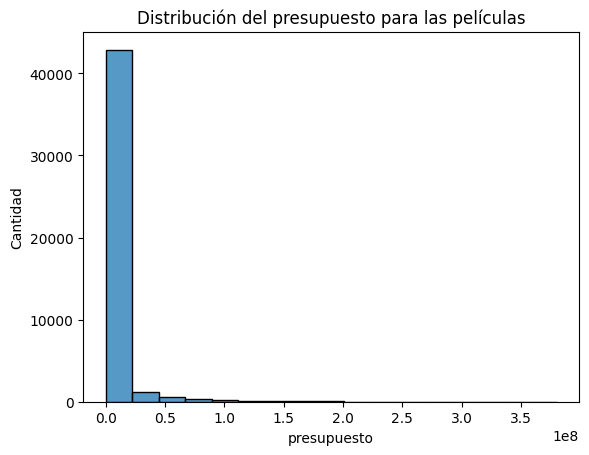

In [23]:
fig, ax = plt.subplots()

sns.histplot(data=df_movies["budget"], kde=False)
ax.set_title("Distribución del presupuesto para las películas")
ax.set_xlabel("presupuesto")
ax.set_ylabel("Cantidad")

plt.show()

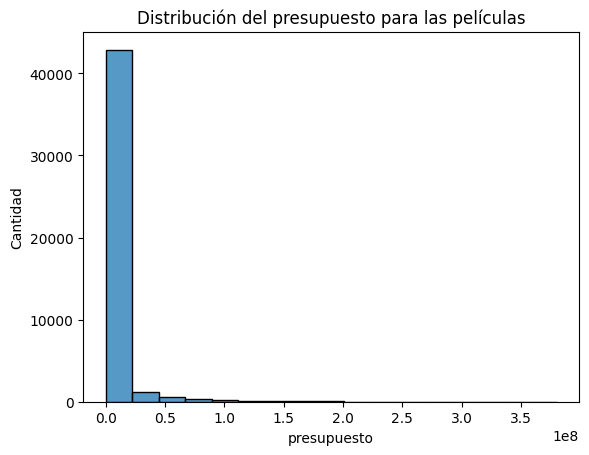

In [24]:
fig, ax = plt.subplots()

sns.histplot(data=df_movies["revenue"], kde=False)
ax.set_title("Distribución de las ganancias de las películas")
ax.set_xlabel("presupuesto")
ax.set_ylabel("Cantidad")

plt.show()

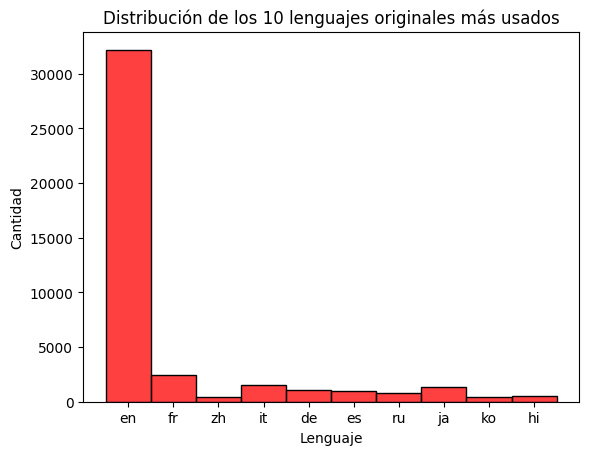

In [25]:
# Cuento la frecuencia de cada lenguaje para seleccionar los 10 más comunes
top_languages = df_movies['original_language'].value_counts().head(10).index

# Aplico un filtrado al DataFrame para que solo contenga los 10 lenguajes más comunes
filtered_df = df_movies[df_movies['original_language'].isin(top_languages)]

fig, ax = plt.subplots()
sns.histplot(data=filtered_df['original_language'], kde=False, color="red", ax=ax)

ax.set_title("Distribución de los 10 lenguajes originales más usados")
ax.set_xlabel("Lenguaje")
ax.set_ylabel("Cantidad")

plt.show()

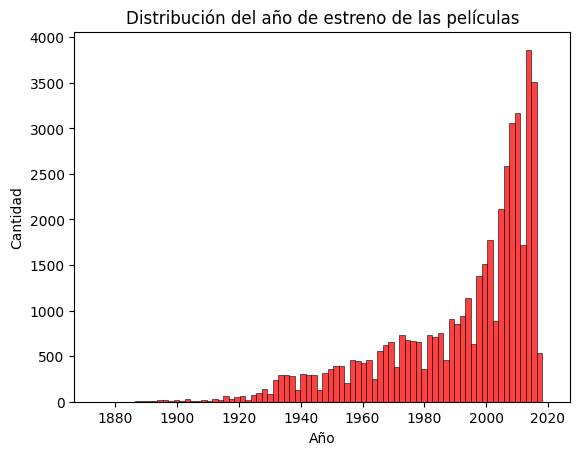

In [26]:
fig, ax = plt.subplots()

sns.histplot(data=df_movies["release_year"], kde=False, color="red")
ax.set_title("Distribución del año de estreno de las películas")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")

plt.show()

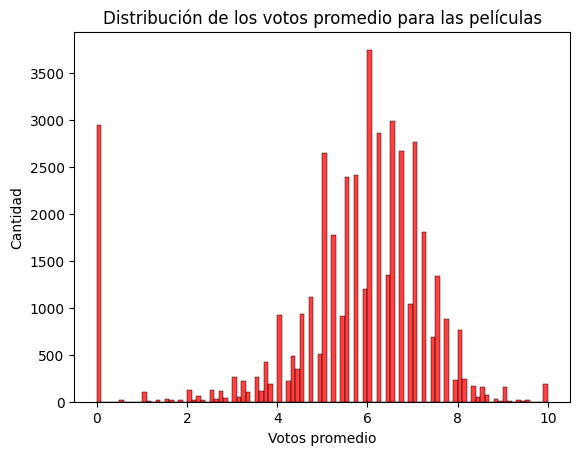

In [27]:
fig, ax = plt.subplots()

sns.histplot(data=df_movies["vote_average"], kde=False, color="red")
ax.set_title("Distribución de los votos promedio para las películas")
ax.set_xlabel("Votos promedio")
ax.set_ylabel("Cantidad")

plt.show()

Nube de palabras en los títulos

In [28]:
# uno todos los títulos en una sola cadena de texto
titulos = " ".join(title for title in df_movies['title'])

# divido la cadena en palabras individuales (tokenización)
palabras = titulos.split()

# cuento la frecuencia de cada palabra
palabras_counts = Counter(palabras)

# Las 10 palabras más comunes
palabras_mas_comunes = palabras_counts.most_common(10)

print(palabras_mas_comunes)

[('The', 10073), ('of', 4824), ('the', 4473), ('and', 1561), ('in', 1386), ('A', 1233), ('a', 1003), ('to', 919), ('Man', 638), ('Love', 634)]


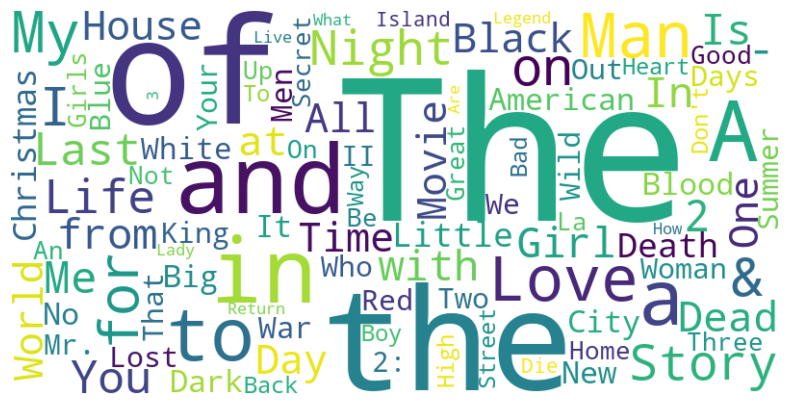

In [29]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                      max_words=100).generate_from_frequencies(palabras_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()